In [1]:
from plotUtilities import *
from math import *
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
from matplotlib.colors import (ListedColormap, BoundaryNorm)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)


In [2]:
def thermal_efficiency(t,a,b,d):
    eps = 0.36*(exp(-a*t)+ log(1+2*b*t**d)/(2*b*t**d))
    return eps

In [3]:
a = [0.56, 1.31, 2.19, 0.27, 0.55, 0.95]
b = [0.17, 0.21, 0.31, 0.10, 0.13, 0.15]
d = [0.74, 1.13, 1.32, 0.60, 0.90, 1.13]

M = [0.01, 0.01, 0.01, 0.05, 0.05, 0.05]
v = [0.1, 0.2, 0.3, 0.1, 0.2, 0.3]


In [4]:
temps = np.linspace(0.001, 15, 60)
datat = [temps]*(len(a))
dataY = np.zeros((6, len(temps)), dtype = list)

In [5]:
for i in range(len(a)):
    for p,t in enumerate(temps):
        dataY[i][p] = thermal_efficiency(t, a[i], b[i], d[i])
labels = []
for Mej,vej in zip(M, v):
    label = f'for M = {Mej}, v ={vej}'
    labels.append(label)

In [12]:

def selectRGB(cmap,N):
    nb = cmap.N//(N-1)
    ls =[]
    for i in range(0,cmap.N, nb-1):
        ls.append(cmap.colors[i])
    return ls

map = matplotlib.cm.get_cmap('rainbow')
values = selectRGB(map, 6)
cmap = ListedColormap(values)
#norm = BoundaryNorm(np.arange(0,1,0.1),cmap.N)


AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

In [ ]:
print(map)

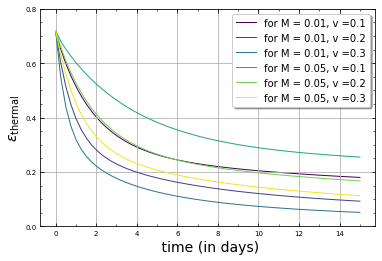

In [11]:
Ax, Lw = asManyPlots(111, [temps]*len(datat), [dataY[i] for i in range(6)], xlabel = ' time (in days)',
                     ylabel = r'$ \epsilon_{\rm{thermal}}$',
                     plotFlag = [True]*(len(datat)), linestyle =['-']*(len(datat)), 
                     linewidth = 1, markerSize =[0]*(len(datat)), color = values, tickSize = 7,
                     label = labels, showLegend = True, legendTextSize = 10, textsize =14)
#plt.xticks(np.arange(0,15,2))
plt.yticks(np.arange(0, 1, 0.2))
Ax.xaxis.set_minor_locator(MultipleLocator(1))
Ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.savefig('plt_epsilon_thermal.pdf', bbox_inches='tight')

In [ ]:
ax, lw = asManyPlots(111,  [temps]*2, [dataY[5], [0.5]*60], xlabel = ' time (in days)', ylabel = r'$ \epsilon_{\rm{thermal}}$', 
                              plotFlag = [True]*2, linestyle =['-']*2, label = ['corrected thermalisation coefficient', 
                                                                                'constant coefficient in original POSSIS'],
                             linewidth = 2, markerSize =[0]*2, color = ['sandybrown', 'crimson'], tickSize =7, 
                              showLegend = True, legendTextSize = 10, textsize =14)
plt.yticks(np.arange(0, 1, 0.2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.savefig('comp_new_old.pdf', bbox_inches='tight')

In [ ]:
print((len(dataY[5])))